# Run Visualization of Prediction

In [1]:
# Enable interactive plot
%matplotlib inline

import logging
log = logging.getLogger()

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import torch

import importlib
from run import path_resolution

/home/yale1/miniconda3/envs/smart-cities/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
debug = True
dry_run = False
num_worker = 20
computease = False

data = "RSO_LModule_Seq"
# data = "RSO_LModule"

In [3]:
# path resolution
base_path = path_resolution()

 -- rsync --
Calling: ['rsync', '-av', '/share/temp/yhartmann/smart-cities-journal-based-on-jonahs-ma/data', '/home/yale1/ma-jonah-data']
sending incremental file list

sent 2,418 bytes  received 35 bytes  4,906.00 bytes/sec
total size is 19,659,198,982  speedup is 8,014,349.36
 -- rsync finished --

Base path: /home/yale1/ma-jonah-data


## Create Datasets

In [4]:
# construct data module
DLModule = getattr(importlib.import_module(f"datasets.{data}"), data)
data_module = DLModule(data_dir=base_path, 
    n_jobs=num_worker, 
    debug=debug,
    batch_size=1)

all_datasets = data_module._load_datasets(sessions=[1])
all_data = torch.utils.data.ConcatDataset(all_datasets)

QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1272.54it/s]
PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | : 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 11586.48it/s]


In [5]:
realsense, optitrack = all_data[0]
# scale down for easier plotting in notebook
sample = realsense.reshape((-1, realsense.shape[-2], realsense.shape[-1]))[:, ::10, ::10].copy()
print(realsense.shape, optitrack.shape)
print(sample.shape)

(241, 1, 480, 848) (241, 63)
(241, 48, 85)


## Visualize Sample

In [6]:
# plt.imshow(np.flip(sample[0]))
# plt.show()

2024-04-09 12:25:35,224 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


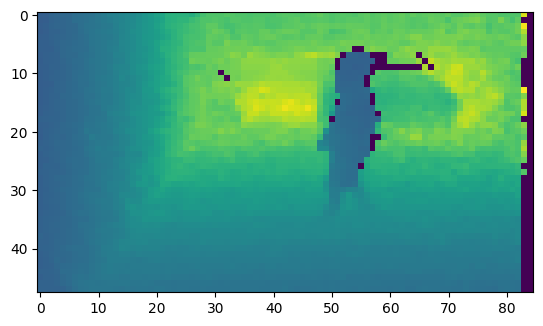

In [7]:
fig, ax = plt.subplots()
ims = [[ax.imshow(np.flip(s), animated=True)] for s in sample]
ani = animation.ArtistAnimation(fig, ims, interval=1000/30, blit=True)
HTML(ani.to_jshtml())